In [1]:
# Copy data (competitive-data-science-final-project.zip) one level before the current directory
# and extract once. 
# Secondary extraction is done with pandas read_csv

In [2]:
import pandas as pd

In [3]:
df_item_cats = pd.read_csv('../competitive-data-science-final-project/item_cats.csv')

In [4]:
df_item_categories = pd.read_csv('../competitive-data-science-final-project/item_categories.csv')

In [5]:
df_items = pd.read_csv('../competitive-data-science-final-project/items.csv')

In [6]:
df_shops = pd.read_csv('../competitive-data-science-final-project/shops.csv')

In [7]:
df_train = pd.read_csv('../competitive-data-science-final-project/sales_train.csv.gz', compression='gzip')

In [8]:
df_test = pd.read_csv('../competitive-data-science-final-project/test.csv.gz', compression='gzip')

In [9]:
def explore(df):
    summary_df = pd.DataFrame()
    
    for i in df.columns:
        line_df = pd.DataFrame([i, 
                                df[i].dtype, 
                                df[i].count(), 
                                df[i].min(), 
                                df[i].max(), 
                                df[i].nunique(), 
                                df[i].isna().sum()]
                              )
        summary_df = pd.concat([ summary_df,line_df], axis=1)
        #summary_df = summary_df.concat()
    summary_df.index = [ "Column_name","dtype", "Total", "Min", "Max", "nUnique", "Nullcount"]
    #Making the first row the column header
    summary_df.columns = summary_df.iloc[0]
    summary_df = summary_df[1:]
    
    return(summary_df)

In [10]:
explore(df_train)

Column_name,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
dtype,object,int64,int64,int64,float64,float64
Total,2935849,2935849,2935849,2935849,2935849,2935849
Min,01.01.2013,0,0,0,-1.0,-22.0
Max,31.12.2014,33,59,22169,307980.0,2169.0
nUnique,1034,34,60,21807,19993,198
Nullcount,0,0,0,0,0,0


In [11]:
explore(df_test)

Column_name,ID,shop_id,item_id
dtype,int64,int64,int64
Total,214200,214200,214200
Min,0,2,30
Max,214199,59,22167
nUnique,214200,42,5100
Nullcount,0,0,0


In [12]:
explore(df_item_categories)

Column_name,item_category_name,item_category_id
dtype,object,int64
Total,84,84
Min,PC - Гарнитуры/Наушники,0
Max,Элементы питания,83
nUnique,84,84
Nullcount,0,0


In [13]:
explore(df_item_cats)

Column_name,item_category_name,item_category_id
dtype,object,int64
Total,84,84
Min,PC - Гарнитуры/Наушники,0
Max,Элементы питания,83
nUnique,84,84
Nullcount,0,0


In [14]:
explore(df_items)

Column_name,item_name,item_id,item_category_id
dtype,object,int64,int64
Total,22170,22170,22170
Min,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,0
Max,Яйцо дракона (Игра престолов),22169,83
nUnique,22170,22170,84
Nullcount,0,0,0


In [15]:
explore(df_shops)

Column_name,shop_name,shop_id
dtype,object,int64
Total,60,60
Min,"!Якутск Орджоникидзе, 56 фран",0
Max,"Ярославль ТЦ ""Альтаир""",59
nUnique,60,60
Nullcount,0,0


In [16]:
def val_counts(df):
    for i in df.columns:
        print(df[i].value_counts(dropna=False))

In [17]:
val_counts(df_train)

28.12.2013    9434
29.12.2013    9335
30.12.2014    9324
30.12.2013    9138
31.12.2014    8347
              ... 
14.05.2015    1174
28.04.2015    1154
06.10.2015    1152
13.05.2015    1128
12.05.2015    1123
Name: date, Length: 1034, dtype: int64
11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: date_block_num, dtype: int64
31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53

In [18]:
df_train.loc[df_train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [19]:
df_train.loc[(df_train.item_id == 2973) & 
             (df_train.shop_id == 32) #& 
            # (df_train.date_block_num == 4)
            ]#.item_price.value_counts()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
67427,29.01.2013,0,32,2973,2499.0,1.0
67428,25.01.2013,0,32,2973,2499.0,1.0
67429,22.01.2013,0,32,2973,2499.0,1.0
67430,21.01.2013,0,32,2973,2499.0,1.0
67431,18.01.2013,0,32,2973,2499.0,1.0
67432,17.01.2013,0,32,2973,2499.0,1.0
67433,15.01.2013,0,32,2973,2499.0,3.0
187844,05.02.2013,1,32,2973,2499.0,1.0
187845,14.02.2013,1,32,2973,2499.0,1.0
484682,23.05.2013,4,32,2973,1249.0,1.0


In [20]:
df_train.loc[df_train.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [21]:
df_train.loc[df_train.item_cnt_day < 0].shop_id.value_counts()

31    451
12    430
54    356
25    316
57    314
6     261
42    251
28    216
19    211
43    211
56    195
47    193
58    173
44    165
53    163
38    162
27    157
37    154
29    151
52    143
16    139
59    137
30    135
26    134
18    132
50    130
15    130
35    128
21    125
4     124
14    120
3     119
24    103
45    103
46    102
7      99
22     97
48     89
5      85
41     82
2      80
17     80
49     42
39     37
32     34
34     25
33     22
23     17
40     13
9       8
8       6
36      3
55      2
20      1
Name: shop_id, dtype: int64

In [22]:
df_train['date']= pd.to_datetime(df_train['date'], dayfirst=True)

In [23]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [24]:
df_train.date.min()

Timestamp('2013-01-01 00:00:00')

In [25]:
df_train.date.max()

Timestamp('2015-10-31 00:00:00')

In [26]:
df_train['Month_Year'] = df_train['date'].dt.to_period('M')
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01


In [27]:
import seaborn as sns

In [28]:
df_train.sort_values(by = "Month_Year", inplace = True)

<AxesSubplot: xlabel='date_block_num', ylabel='Count'>

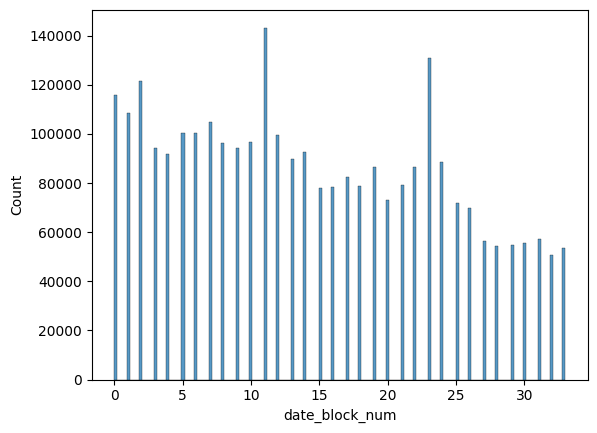

In [29]:
sns.histplot(data = df_train, x = "date_block_num")